# Загружаем граф из csv

[['Вильнюс', 'Брест', 531], ['Витебск', 'Брест', 638], ['Витебск', 'Вильнюс', 360], ['Воронеж', 'Витебск', 869], ['Воронеж', 'Волгоград', 581], ['Волгоград', 'Витебск', 1455], ['Витебск', 'Ниж.Новгород', 911], ['Вильнюс', 'Даугавпилс', 211], ['Калининград', 'Брест', 699], ['Калининград', 'Вильнюс', 333], ['Каунас', 'Вильнюс', 102], ['Киев', 'Вильнюс', 734], ['Киев', 'Житомир', 131], ['Житомир', 'Донецк', 863], ['Житомир', 'Волгоград', 1493], ['Кишинев', 'Киев', 467], ['Кишинев', 'Донецк', 812], ['С.Петербург', 'Витебск', 602], ['С.Петербург', 'Калининград', 739], ['С.Петербург', 'Рига', 641], ['Москва', 'Казань', 815], ['Москва', 'Ниж.Новгород', 411], ['Москва', 'Минск', 690], ['Москва', 'Донецк', 1084], ['Москва', 'С.Петербург', 664], ['Мурманск', 'С.Петербург', 1412], ['Мурманск', 'Минск', 2238], ['Орел', 'Витебск', 522], ['Орел', 'Донецк', 709], ['Орел', 'Москва', 368], ['Одесса', 'Киев', 487], ['Рига', 'Каунас', 267], ['Таллинн', 'Рига', 308], ['Харьков', 'Киев', 471], ['Харьков', 

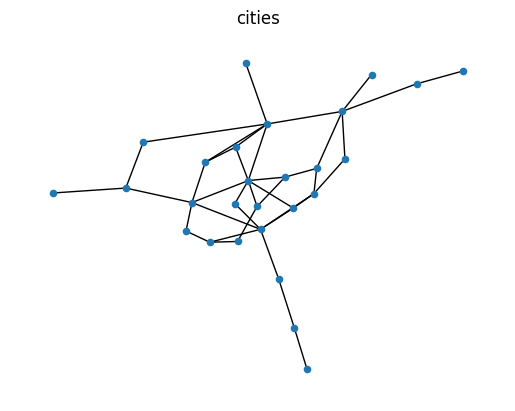

In [1]:
import csv
import os

import matplotlib.pyplot as plt
import networkx as nx

os.environ["SOURCE_NODE"] = "Брест"
os.environ["DESTINATION_NODE"] = "Казань"

SOURCE_NODE = os.getenv("SOURCE_NODE")  # Брест
DESTINATION_NODE = os.getenv("DESTINATION_NODE")  # Казань

graph_edges = list()
with open("data.csv", "r") as dataset:
    for line in dataset.readlines():
        e = line.split(";")
        graph_edges.append([
            e[0],
            e[1],
            int(e[2].replace("\n", ""))
        ])
print(graph_edges)

G = nx.Graph()
for e in graph_edges:
    G.add_edge(e[0], e[1], weight=e[2])

main_pos = nx.spring_layout(G, seed=17)
from draw_graph import draw_graph as dg

dg(G, main_pos, title_string="cities")

# Поиск в ширину

In [2]:
bfs_edges = []
for e in nx.bfs_edges(G, source=SOURCE_NODE):
    bfs_edges.append(e)
    if e.__contains__(DESTINATION_NODE):
        break
print("all bfs edges:")
for e in nx.bfs_edges(G, source=SOURCE_NODE):
    print(e)
print("bfs edges till DESTINATION_NODE:")
for e in bfs_edges:
    print(e)

all bfs edges:
('Брест', 'Вильнюс')
('Брест', 'Витебск')
('Брест', 'Калининград')
('Вильнюс', 'Даугавпилс')
('Вильнюс', 'Каунас')
('Вильнюс', 'Киев')
('Витебск', 'Воронеж')
('Витебск', 'Волгоград')
('Витебск', 'Ниж.Новгород')
('Витебск', 'С.Петербург')
('Витебск', 'Орел')
('Каунас', 'Рига')
('Киев', 'Житомир')
('Киев', 'Кишинев')
('Киев', 'Одесса')
('Киев', 'Харьков')
('Воронеж', 'Ярославль')
('Ниж.Новгород', 'Москва')
('С.Петербург', 'Мурманск')
('Орел', 'Донецк')
('Рига', 'Таллинн')
('Харьков', 'Симферополь')
('Ярославль', 'Минск')
('Москва', 'Казань')
('Казань', 'Уфа')
('Уфа', 'Самара')
bfs edges till DESTINATION_NODE:
('Брест', 'Вильнюс')
('Брест', 'Витебск')
('Брест', 'Калининград')
('Вильнюс', 'Даугавпилс')
('Вильнюс', 'Каунас')
('Вильнюс', 'Киев')
('Витебск', 'Воронеж')
('Витебск', 'Волгоград')
('Витебск', 'Ниж.Новгород')
('Витебск', 'С.Петербург')
('Витебск', 'Орел')
('Каунас', 'Рига')
('Киев', 'Житомир')
('Киев', 'Кишинев')
('Киев', 'Одесса')
('Киев', 'Харьков')
('Воронеж', 'Я

# Путь поиска в ширину

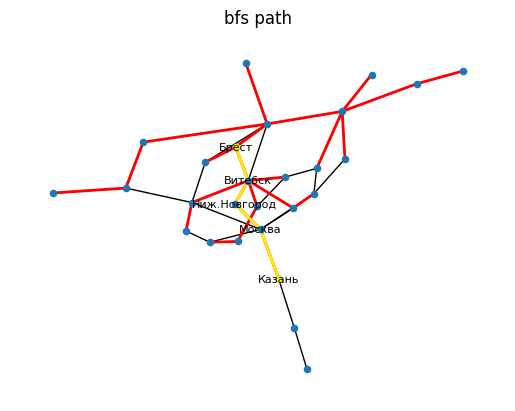

In [3]:
from find_path_and_draw import find_path_and_draw as fpd
fpd(G, bfs_edges, main_pos, title_string="bfs path", print_nodes=False)

# Дерево поиска в ширину

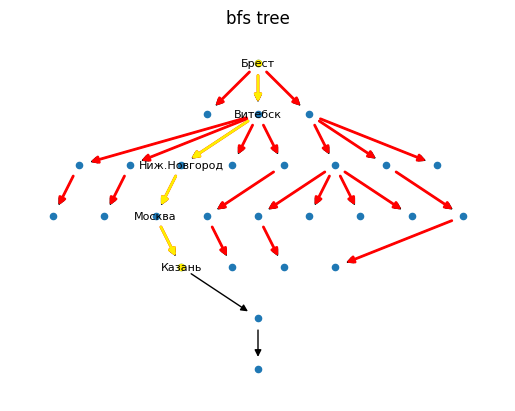

complexity: 
15625


In [4]:
from generate_tree_position import generate_tree_position as gtp
bfs_tree_ = nx.bfs_tree(G, source=SOURCE_NODE)
pos_bfs_tree = gtp(bfs_tree_)
fpd(bfs_tree_, bfs_edges, pos_bfs_tree, title_string="bfs tree", print_nodes=False)
# compute complexity as b^(d+1) b - branching factor; d - minimum result depth
from maximum_branching_factor import maximum_branching_factor as mbf
b = mbf(bfs_tree_)
d = len(nx.shortest_path(bfs_tree_, os.getenv("SOURCE_NODE"), os.getenv("DESTINATION_NODE")))
print("complexity: ")
print(b**(d+1))

# Поиск в глубину

In [5]:
dfs_edges = list()
for e in nx.dfs_edges(G, source=SOURCE_NODE):
    dfs_edges.append(e)
    if e.__contains__(DESTINATION_NODE):
        break
print("all dfs edges:")
for e in nx.dfs_edges(G, source=SOURCE_NODE):
    print(e)

all dfs edges:
('Брест', 'Вильнюс')
('Вильнюс', 'Витебск')
('Витебск', 'Воронеж')
('Воронеж', 'Волгоград')
('Волгоград', 'Житомир')
('Житомир', 'Киев')
('Киев', 'Кишинев')
('Кишинев', 'Донецк')
('Донецк', 'Москва')
('Москва', 'Казань')
('Казань', 'Уфа')
('Уфа', 'Самара')
('Москва', 'Ниж.Новгород')
('Москва', 'Минск')
('Минск', 'Мурманск')
('Мурманск', 'С.Петербург')
('С.Петербург', 'Калининград')
('С.Петербург', 'Рига')
('Рига', 'Каунас')
('Рига', 'Таллинн')
('Минск', 'Ярославль')
('Москва', 'Орел')
('Киев', 'Одесса')
('Киев', 'Харьков')
('Харьков', 'Симферополь')
('Вильнюс', 'Даугавпилс')


# Путь поиска в глубину

path:
[('Брест', 'Вильнюс'), ('Вильнюс', 'Витебск'), ('Витебск', 'Воронеж'), ('Воронеж', 'Волгоград'), ('Волгоград', 'Житомир'), ('Житомир', 'Киев'), ('Киев', 'Кишинев'), ('Кишинев', 'Донецк'), ('Донецк', 'Москва'), ('Москва', 'Казань')]


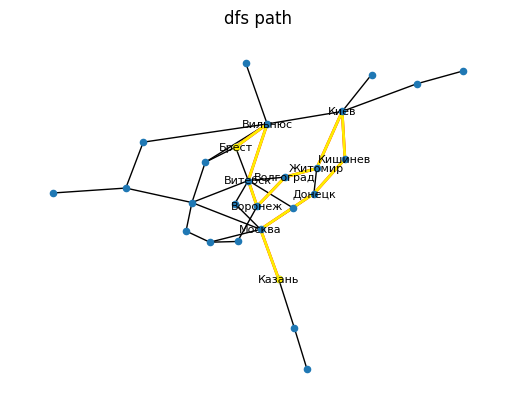

In [6]:
from find_path_and_draw import find_path_and_draw as fpd
fpd(G, dfs_edges, main_pos, title_string="dfs path")

# Дерево поиска в глубину

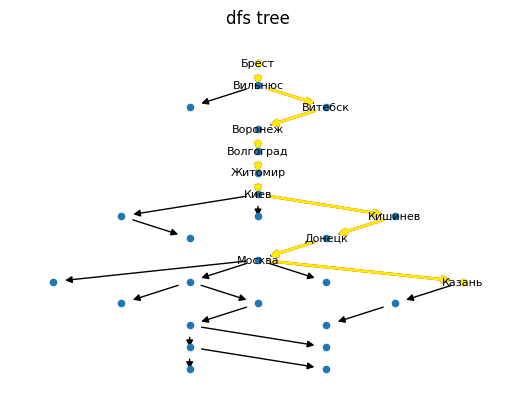

complexity:
18014398509481984


In [7]:
from find_path_and_draw import find_path_and_draw as fpd
from generate_tree_position import generate_tree_position as gtp
dfs_tree_ = nx.dfs_tree(G, source=SOURCE_NODE)
pos_dfs_tree = gtp(dfs_tree_)
fpd(dfs_tree_, dfs_edges, pos_dfs_tree, title_string="dfs tree", print_nodes=False)
# compute complexity as b^m where b - branching factor; m - maximum tree depth

b = mbf(dfs_tree_)
m = len(nx.shortest_path_length(dfs_tree_, SOURCE_NODE))
print("complexity:")
print(b**m)

# Поиск с итеративным углублением

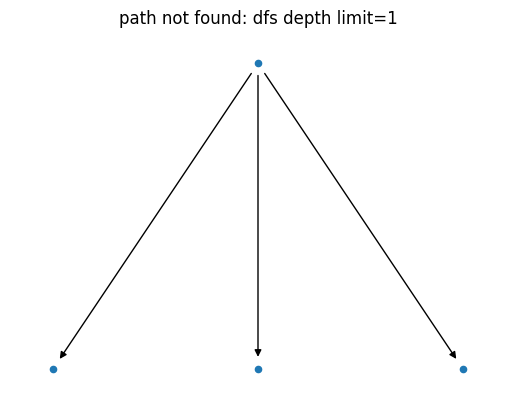

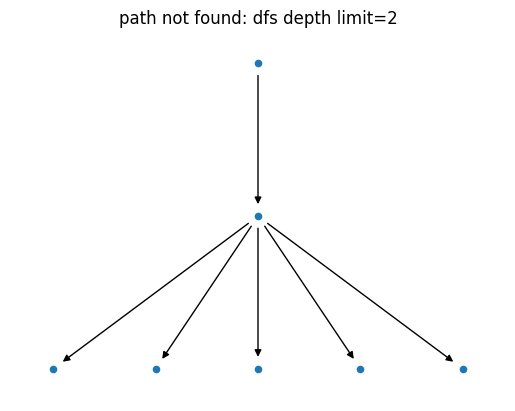

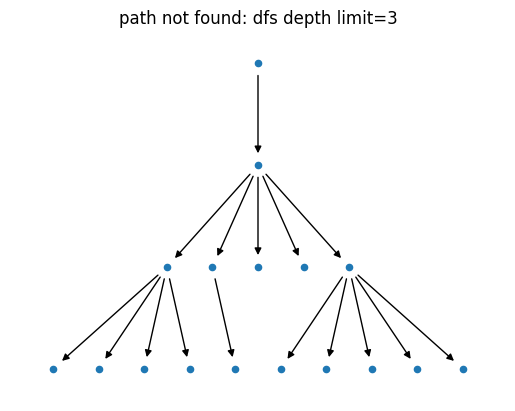

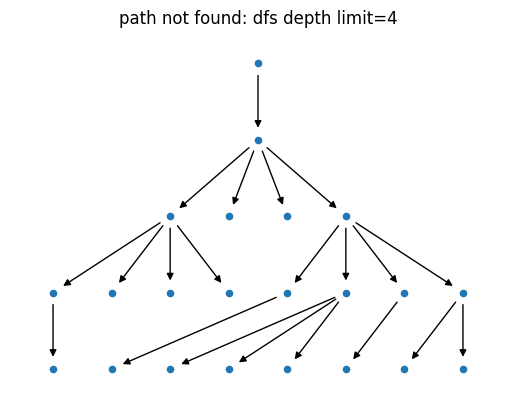

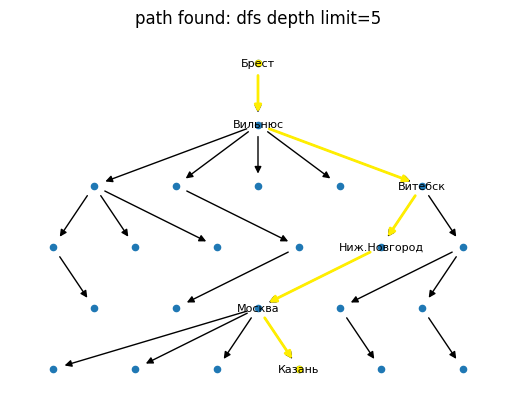

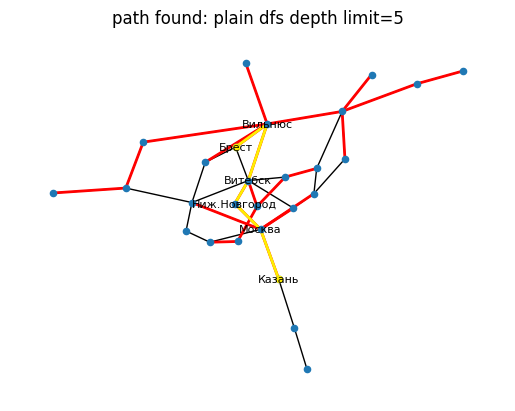

complexity for limit= 5 :
3125


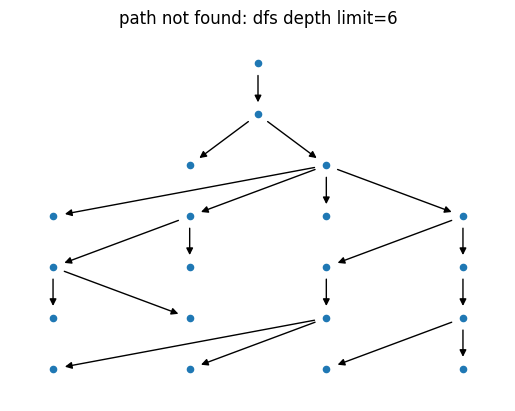

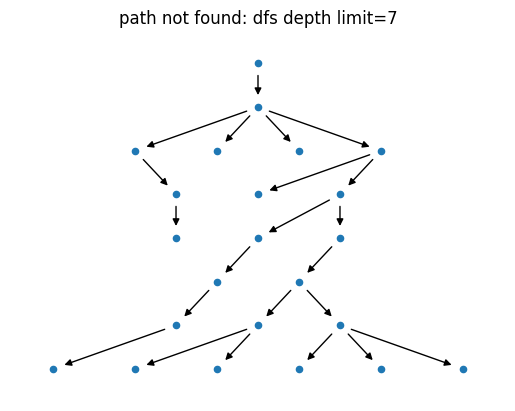

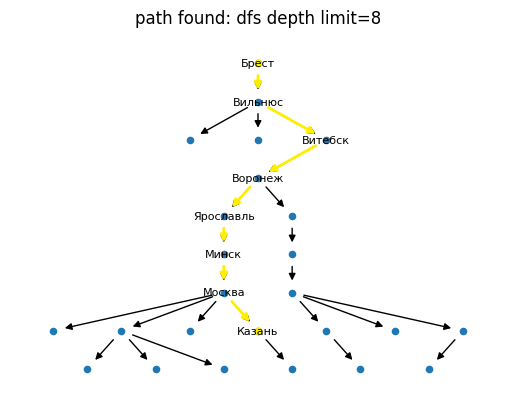

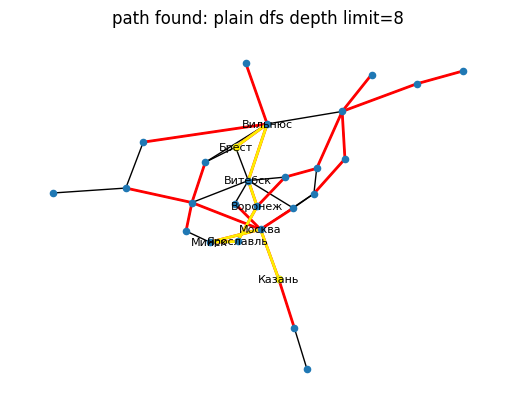

complexity for limit= 8 :
65536


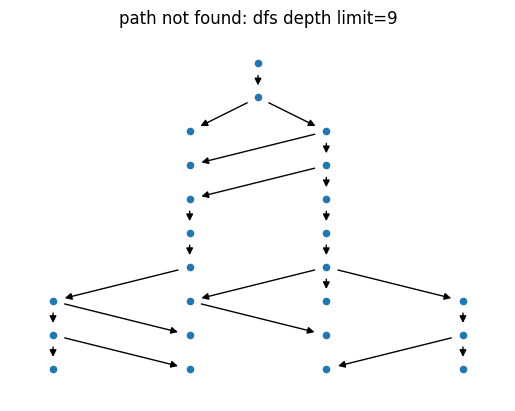

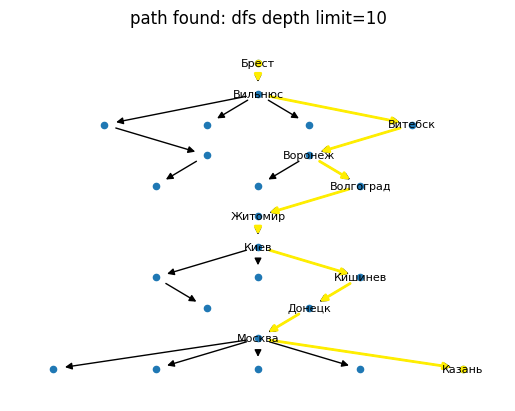

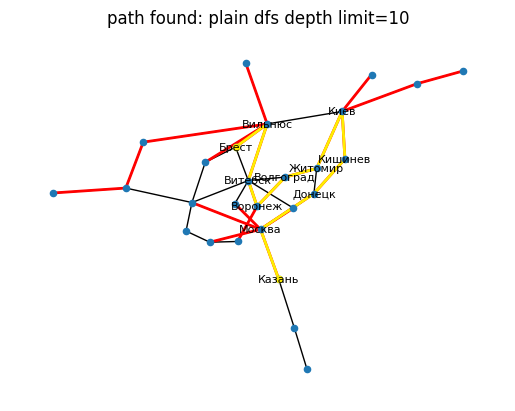

complexity for limit= 10 :
9765625


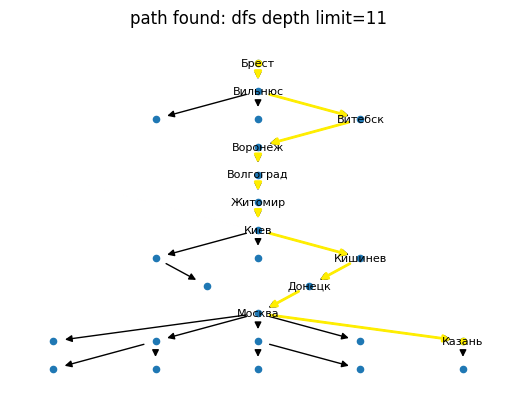

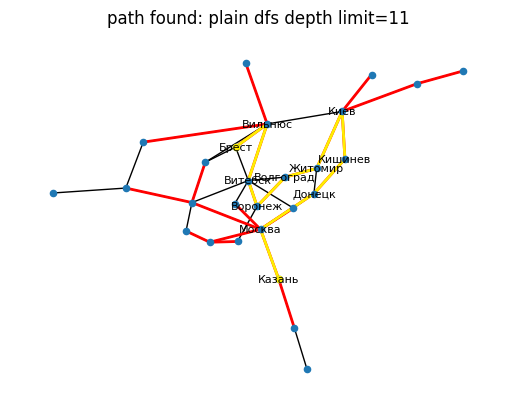

complexity for limit= 11 :
48828125


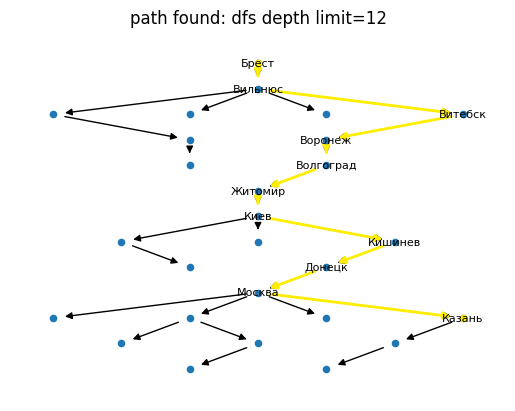

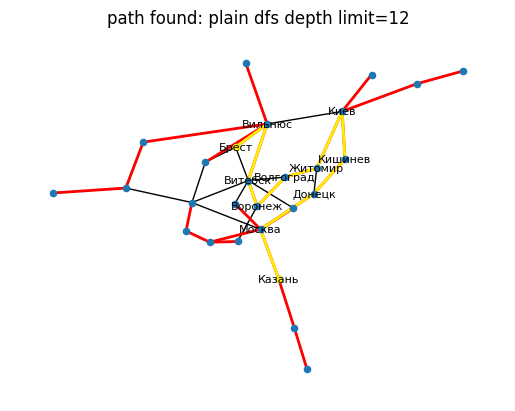

complexity for limit= 12 :
16777216


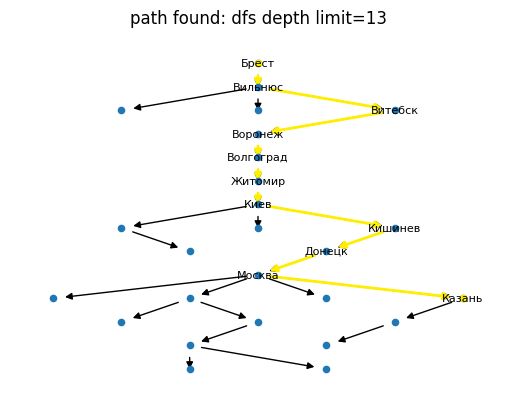

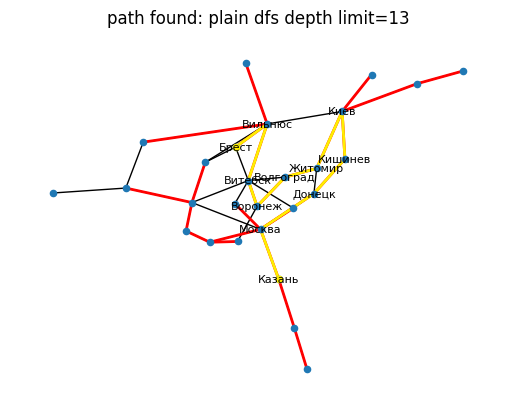

complexity for limit= 13 :
67108864


In [8]:
from generate_tree_position import generate_tree_position as gtp
from find_path_and_draw import find_path_and_draw as fpd
from draw_graph import draw_graph as dg
for L in range(1, 14):
    dfs_tree_ = nx.dfs_tree(G, source=SOURCE_NODE, depth_limit=L)
    tree_pos = gtp(dfs_tree_)
    if dfs_tree_.nodes.__contains__(DESTINATION_NODE):
        fpd(dfs_tree_, list(dfs_tree_.edges), tree_pos, title_string="path found: dfs depth limit="+str(L),
            mark_red=False, print_nodes=False)
        fpd(G, list(dfs_tree_.edges), main_pos, title_string="path found: plain dfs depth limit="+str(L), print_nodes=False)
        # compute complexity as b^d where b - branching factor; d - minimum result depth
        b = mbf(dfs_tree_)
        d = L
        print("complexity for limit=",L,":")
        print(b**d)
    else:
        dg(dfs_tree_, tree_pos, title_string="path not found: dfs depth limit="+str(L))


# Двунаправленный поиск

intersection:
{'Орел', 'Ниж.Новгород', 'С.Петербург'}


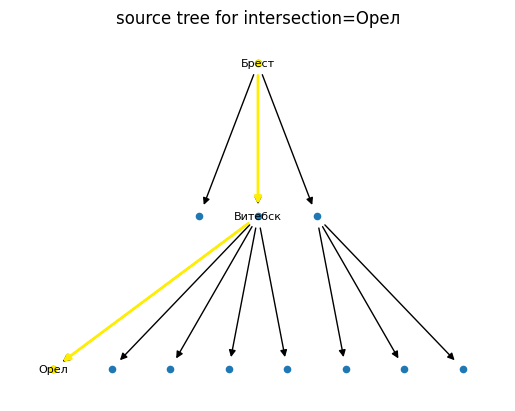

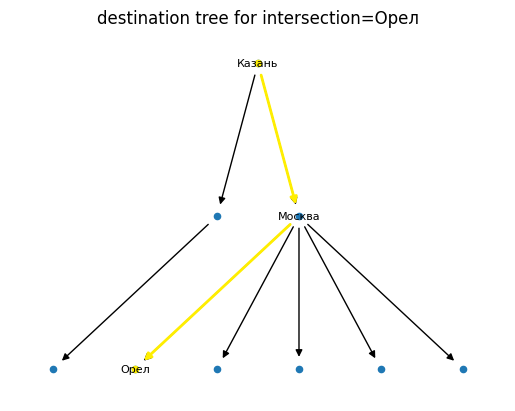

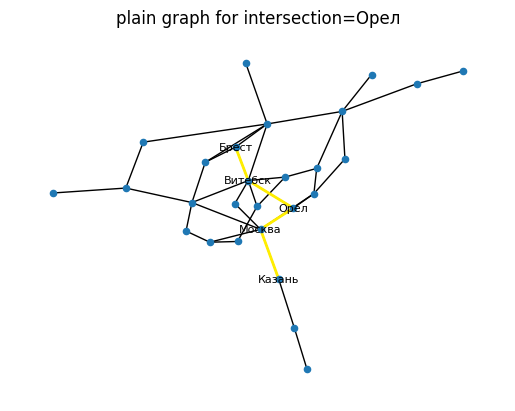

complexity:
25.0


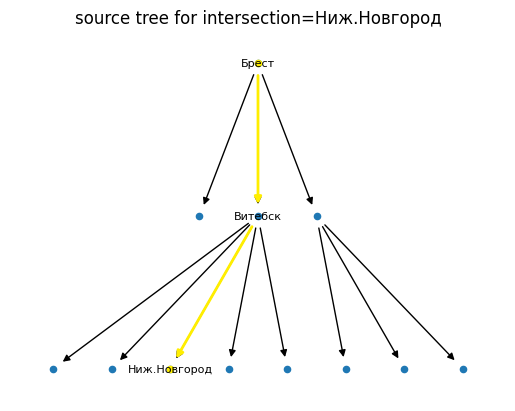

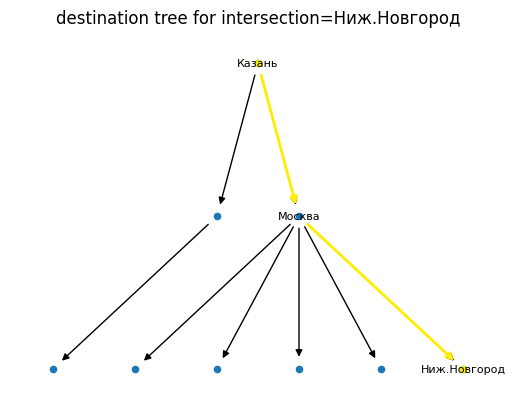

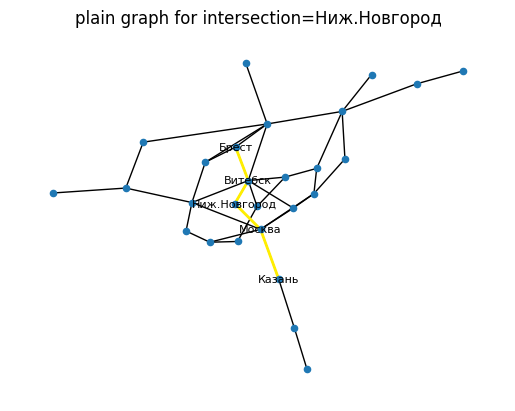

complexity:
25.0


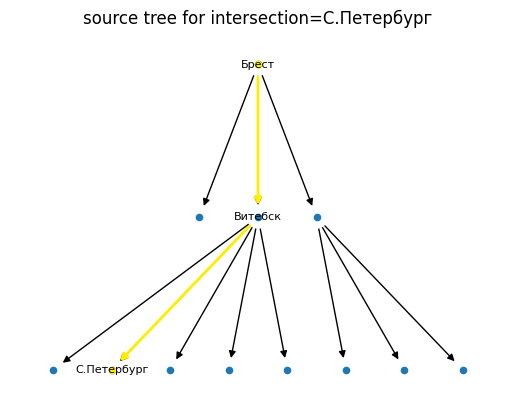

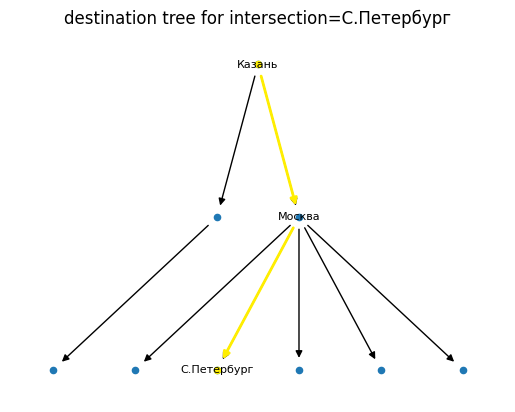

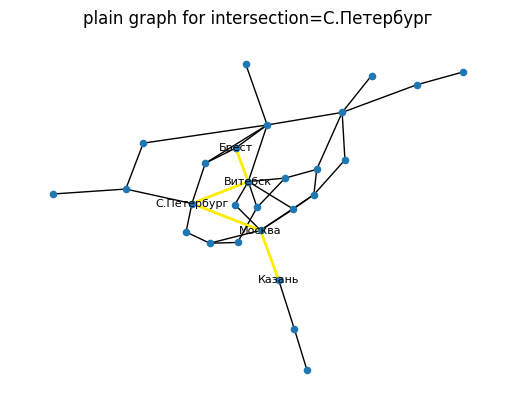

complexity:
25.0


In [9]:
L = 1
intersection_nodes = None
while True:
    source_tree = nx.bfs_tree(G, source=SOURCE_NODE, depth_limit=L)
    destination_tree = nx.bfs_tree(G, source=DESTINATION_NODE, depth_limit=L)
    intersection_nodes = set(source_tree.nodes).intersection(set(destination_tree.nodes))
    if intersection_nodes != set():
        break
    L += 1
source_tree_pos = gtp(source_tree)
destination_tree_pos = gtp(destination_tree)
print("intersection:")
print(intersection_nodes)
for intersection_node in intersection_nodes:
    fpd(source_tree, source_tree.edges, source_tree_pos, title_string="source tree for intersection="+str(intersection_node),
        source_node=SOURCE_NODE,
        destination_node=intersection_node, print_nodes=False, mark_red=False)
    fpd(destination_tree, destination_tree.edges, destination_tree_pos, title_string="destination tree for intersection="+str(intersection_node),
        source_node=DESTINATION_NODE,
        destination_node=intersection_node, print_nodes=False, mark_red=False)
    # generate edges from nodes for draw path on plain graph source_tree.edges+destination_tree.destination_tree.edges
    nx.draw_networkx_nodes(G, main_pos, node_size=20)
    nx.draw_networkx_edges(G, main_pos, edgelist=G.edges)
    s_path = nx.shortest_path(source_tree, source=SOURCE_NODE, target=intersection_node)
    d_path = nx.shortest_path(destination_tree, source=DESTINATION_NODE, target=intersection_node)
    bidirectional_path_edges = []
    bidirectional_path_labels_dict = dict()
    for i in range(len(s_path) - 1):
        bidirectional_path_edges.append((s_path[i], s_path[i + 1]))
        bidirectional_path_labels_dict.update({s_path[i]: str(s_path[i])})
        bidirectional_path_labels_dict.update({s_path[i+1]: str(s_path[i+1])})
    for i in range(len(d_path) - 1):
        bidirectional_path_edges.append((d_path[i], d_path[i + 1]))
        bidirectional_path_labels_dict.update({d_path[i]: str(d_path[i])})
        bidirectional_path_labels_dict.update({d_path[i+1]: str(d_path[i+1])})
    nx.draw_networkx_edges(G, main_pos, edgelist=bidirectional_path_edges, edge_color='#ffee00', width=2)
    nx.draw_networkx_labels(G, main_pos, labels=bidirectional_path_labels_dict, font_size=8)
    plt.title("plain graph for intersection="+str(intersection_node))
    plt.axis("off")
    plt.show()
    # compute complexity as b^(d/2) b - branching factor; d - minimum result depth
    b = max(mbf(source_tree), mbf(destination_tree))
    d = len(bidirectional_path_edges)
    print("complexity:")
    print(b**(d/2))

 # Функция эвристики h(n)

In [10]:
tr = dict()
c = 0
with open("ruseng.csv", "r") as f:
    reader = csv.DictReader(f)
    for row in reader:
        tr.update({row["eng"]: row["rus"]})
        print(row["rus"], row["eng"])
        c+=1
print("c=", c)

my_cities = dict()
with open("worldcities.csv", "r", newline='') as f:
    reader = csv.DictReader(f)
    for row in reader:
        if tr.get(row["city_ascii"]) is not None:
            my_cities.update({
                tr.get(row["city_ascii"]): (row["lat"], row["lng"])
                                            })
print(my_cities)
print(len(my_cities))
print(len(G.nodes))

Минск Minsk
Брест Brest
Витебск Vitsyebsk
Даугавпилс Daugavpils
Калининград Kaliningrad
Воронеж Voronezh
Харьков Kharkiv
Киев Kyiv
Донецк Donetsk
Москва Moscow
Казань Kazan
Рига Riga
Орел Orel
Житомир Zhytomyr
Симферополь Simferopol
Волгоград Volgograd
Мурманск Murmansk
Каунас Kaunas
С.Петербург Saint Petersburg
Уфа Ufa
Таллинн Tallinn
Ниж.Новгород Nizhniy Novgorod
Самара Samara
Одесса Odessa
Ярославль Yaroslavl
Кишинев Chisinau
Вильнюс Vilnius
c= 27
{'Москва': ('46.7307', '-116.9986'), 'С.Петербург': ('59.9500', '30.3167'), 'Киев': ('50.4500', '30.5236'), 'Минск': ('53.9022', '27.5618'), 'Харьков': ('50.0000', '36.2292'), 'Ниж.Новгород': ('56.3269', '44.0075'), 'Казань': ('55.7908', '49.1144'), 'Самара': ('53.1833', '50.1167'), 'Уфа': ('54.7261', '55.9475'), 'Воронеж': ('51.6717', '39.2106'), 'Волгоград': ('48.7086', '44.5147'), 'Кишинев': ('47.0228', '28.8353'), 'Рига': ('43.0802', '-77.8753'), 'Вильнюс': ('54.6833', '25.2833'), 'Таллинн': ('59.4372', '24.7450'), 'Донецк': ('48.3369'

# Считаем эвристику как расстояние по прямой между городами
## Используем формулу Хаверсина (длина пути между двумя точками на сфере)

In [11]:
import math
def h(city):
    R = 6371
    target = my_cities.get(DESTINATION_NODE)
    lat1 = float(target[0])
    lng1 = float(target[1])
    lat2 = float(my_cities.get(city)[0])
    lng2 = float(my_cities.get(city)[1])
    phi1 = lat1 * math.pi / 180
    phi2 = lat2 * math.pi / 180
    d_phi = abs(lat1 - lat2) * math.pi / 180
    d_lambda = abs(lng1 - lng2) * math.pi / 180
    a = math.sin(d_phi / 2)**2 + math.cos(phi1) * math.cos(phi2) * math.sin(d_lambda / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c
    return d

# Жадный поиск по первому наилучшему соответствию

In [12]:
current_node = SOURCE_NODE
visited = list()
count = 0
costs = []
max_branch_greedy_factor = 0
while current_node != DESTINATION_NODE:
    print(count, "*******")
    visited.append(current_node)
    nodes = list(nx.dfs_preorder_nodes(G, current_node, depth_limit=1))
    max_branch_greedy_factor = max(len(nodes), max_branch_greedy_factor)
    for visited_node in list(visited):
        if nodes.__contains__(visited_node):
            nodes.remove(visited_node)
    min_node = nodes[0]
    min_h = float('inf')
    for i in range(len(nodes)):
        print("h(",nodes[i],") =",h(nodes[i]))
        if min_h > h(nodes[i]) and not visited.__contains__(nodes[i]):
            min_node = nodes[i]
            min_h = h(nodes[i])
    print("min:", min_node)
    costs.append(G.edges.get((current_node, min_node))["weight"])
    current_node = min_node
    count += 1
    if count > 20:
        break
print("path:", visited)
print("end_node:", current_node)
print("accumulated_cost:", sum(costs))
avg_step_cost = sum(costs) / len(costs)
print("avg_step_cost:", avg_step_cost)
print("max_branch_greedy_factor:", max_branch_greedy_factor)
visited.append(current_node)
print("complexity:", max_branch_greedy_factor**(1 + sum(costs) / avg_step_cost))

0 *******
h( Вильнюс ) = 1508.4096171148894
h( Витебск ) = 1191.918786466969
h( Калининград ) = 1804.3960823392015
min: Витебск
1 *******
h( Вильнюс ) = 1508.4096171148894
h( Воронеж ) = 795.1807597481139
h( Волгоград ) = 847.0124782845228
h( Ниж.Новгород ) = 322.53588772361303
h( С.Петербург ) = 1198.7687708776514
h( Орел ) = 899.5316852380823
min: Ниж.Новгород
2 *******
h( Москва ) = 8541.610784068394
min: Москва
3 *******
h( Казань ) = 0.0
h( Минск ) = 1389.9118226999526
h( Донецк ) = 1037.3405404052116
h( С.Петербург ) = 1198.7687708776514
h( Орел ) = 899.5316852380823
min: Казань
path: ['Брест', 'Витебск', 'Ниж.Новгород', 'Москва']
end_node: Казань
accumulated_cost: 2775
avg_step_cost: 693.75
max_branch_greedy_factor: 8
complexity: 32768.0


# Путь жадного поиска по первому наилучшему соответствию

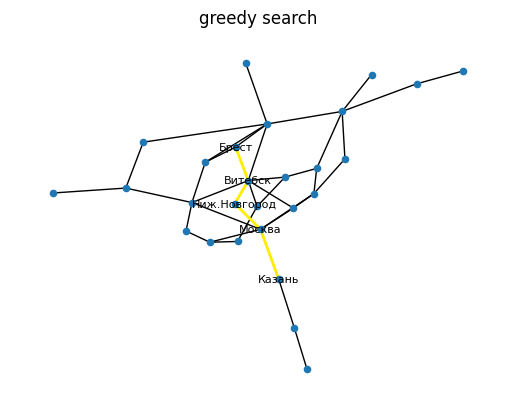

In [13]:
greedy_edges = []
for i in range(len(visited) - 1):
    greedy_edges.append((visited[i], visited[i+1]))
nx.draw_networkx_nodes(G, main_pos, G.nodes, node_size=20)
nx.draw_networkx_edges(G, main_pos, G.edges, width=1)
nx.draw_networkx_edges(G, main_pos, greedy_edges, edge_color='#ffee00', width=2)
visited_greedy_labels_dict = dict()
for node in visited:
    visited_greedy_labels_dict.update({
        node: str(node)
    })
nx.draw_networkx_labels(G, main_pos, visited_greedy_labels_dict, font_size=8)
plt.title("greedy search")
plt.axis("off")
plt.show()


# Алгоритм a-star

path: ['Брест', 'Витебск', 'Орел', 'Москва', 'Казань']
cost:  2343
astar_branch_factor: 8
complexity: 32768.0


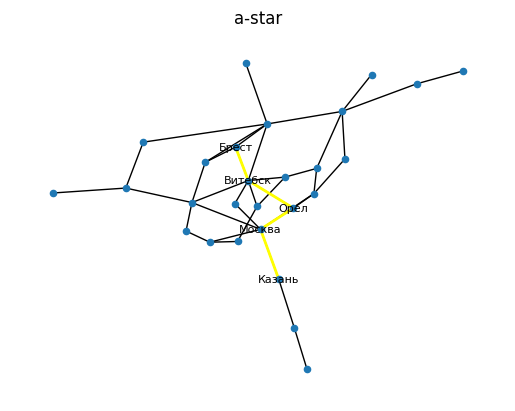

In [14]:
def astar_heuristic (a, b):
    return h(a)
astar_p = nx.astar_path(G, source=SOURCE_NODE, target=DESTINATION_NODE, heuristic=astar_heuristic)
astar_cost = nx.astar_path_length(G, source=SOURCE_NODE, target=DESTINATION_NODE, heuristic=astar_heuristic)
print("path:", astar_p)
print("cost: ", astar_cost)
# compute branch factor & average_step_cost & make edges from path
astar_edges = []
astar_branch_factor = 0
astar_costs = []
for i in range(len(astar_p) - 1):
    astar_edges.append((astar_p[i], astar_p[i + 1]))
    astar_branch_factor = max(astar_branch_factor, len(list(nx.dfs_preorder_nodes(G, astar_p[i], depth_limit=1))))
    astar_costs.append(G.edges.get((astar_p[i], astar_p[i + 1]))["weight"])
print("astar_branch_factor:", astar_branch_factor)
astar_avg_step_cost = sum(astar_costs) / len(astar_costs)
print("complexity:", astar_branch_factor**(1 + astar_cost / astar_avg_step_cost))

nx.draw_networkx_nodes(G, main_pos, node_size=20)
nx.draw_networkx_edges(G, main_pos, width=1)
nx.draw_networkx_edges(G, main_pos, edgelist=astar_edges, width=2, edge_color="yellow")
astar_labels_dict = dict()
for node in astar_p:
    astar_labels_dict.update({
        node: str(node)
    })
nx.draw_networkx_labels(G, main_pos, labels=astar_labels_dict, font_size=8)
plt.title("a-star")
plt.axis("off")
plt.show()

# Сравнение результатов
| Алгоритм | Вычисленная сложность |
|---------|-----------------------|
|BFS	| 15625                 |
|DFS	| 18014398509482000     |
|DFS L = 5	| 3125                  |
|DFS L = 8| 	65536                |
|DFS L = 10| 	9765625              |
|DFS L = 11| 	48828125             |
|DFS L = 12| 	16777216             |
|DFS L = 13|	67108864|
|Bi-Directional|	25|
|Greedy|	32768|
|A-Star|	32768|

# Вывод
Сравнение показывает, что на данном графе лучше всего себя показал алгоритм двунаправленного поиска. Оценка алгоритмов информированного поиска показали одинаковый результат, порядок сопоставим с алгоритмом поиска в ширину. Также можем видеть как деградирует алгорим с итеративным углублением при увеличении лимита прыжков, хотя при наименьшем лимите порядок вычисленной сложности даже меньше чем у алгоритмов информированного поиска.